In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import seaborn as sns

In [8]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jtZTI4SI2WOqByytmJIQtgYH-srxfGO_ZRfXglQuDmau',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'tennisproject-donotdelete-pr-9y2v4pgadevfjp'
object_key = 'CocoG.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

summary = pd.read_csv(body)
summary.head(10)

,Year,M,W,L,Win%,Set W-L,Set%,Game W-L,Game%,TB W-L,...,A%,DF%,1stIn,1st%,2nd%,SPW,RPW,TPW,DR,Best
0,2024,66,50,16,75.8%,106-44,70.7%,808-539,60.0%,8-7,...,5.2%,9.2%,57.5%,72.2%,44.1%,60.3%,48.6%,54.4%,1.22,W (2x)
1,2023,67,51,16,76.1%,107-43,71.3%,776-563,58.0%,8-1,...,6.0%,5.1%,60.7%,68.1%,47.6%,60.1%,45.7%,52.9%,1.14,W (4x)
2,2022,61,38,23,62.3%,80-51,61.1%,672-572,54.0%,10-7,...,6.0%,7.5%,63.0%,65.9%,45.8%,58.5%,44.7%,51.5%,1.08,F (Roland Garros)
3,2021,50,34,16,68.0%,69-46,60.0%,590-514,53.4%,10-7,...,6.8%,7.2%,60.4%,67.7%,46.2%,59.2%,43.4%,51.3%,1.06,W (Parma)
4,2020,18,10,8,55.6%,26-19,57.8%,229-217,51.3%,3-2,...,4.0%,10.6%,61.0%,68.8%,41.3%,58.1%,41.9%,50.2%,1.00,SF (Lexington)
5,2019,16,11,5,68.8%,21-16,56.8%,172-176,49.4%,3-0,...,3.9%,6.8%,65.2%,64.7%,42.8%,57.1%,42.8%,49.9%,1.00,W (Linz)


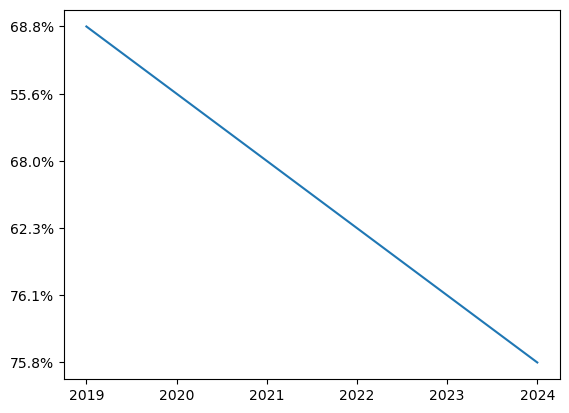

In [9]:
plt.plot(summary['Year'], summary['Win%'])  # Plot the chart
plt.show()  # display

## More detailed Data

In [10]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jtZTI4SI2WOqByytmJIQtgYH-srxfGO_ZRfXglQuDmau',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'tennisproject-donotdelete-pr-9y2v4pgadevfjp'
object_key = 'wta_matches_2020.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

y2020= pd.read_csv(body)
y2020.head(10)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2020-1049,Auckland,Hard,32,I,20200106,300,200033,1,NaN,...,50.0,31.0,12.0,9.0,12.0,15.0,10.0,3935.0,82.0,743.0
1,2020-1049,Auckland,Hard,32,I,20200106,299,200033,1,NaN,...,22.0,12.0,2.0,7.0,0.0,5.0,10.0,3935.0,25.0,1734.0
2,2020-1049,Auckland,Hard,32,I,20200106,298,202468,NaN,NaN,...,56.0,34.0,9.0,13.0,7.0,13.0,82.0,743.0,39.0,1353.0
3,2020-1049,Auckland,Hard,32,I,20200106,297,200033,1,NaN,...,45.0,26.0,5.0,9.0,1.0,4.0,10.0,3935.0,73.0,805.0
4,2020-1049,Auckland,Hard,32,I,20200106,296,216153,3,NaN,...,62.0,35.0,8.0,13.0,11.0,18.0,25.0,1734.0,262.0,223.0
5,2020-1049,Auckland,Hard,32,I,20200106,295,201496,5,NaN,...,28.0,20.0,8.0,8.0,5.0,8.0,39.0,1353.0,41.0,1331.0
6,2020-1049,Auckland,Hard,32,I,20200106,294,202468,NaN,NaN,...,26.0,13.0,7.0,6.0,6.0,10.0,82.0,743.0,57.0,1015.0
7,2020-1049,Auckland,Hard,32,I,20200106,293,200033,1,NaN,...,56.0,29.0,13.0,13.0,6.0,12.0,10.0,3935.0,86.0,720.0
8,2020-1049,Auckland,Hard,32,I,20200106,292,201696,NaN,NaN,...,52.0,29.0,12.0,15.0,5.0,13.0,73.0,805.0,67.0,855.0
9,2020-1049,Auckland,Hard,32,I,20200106,291,216153,3,NaN,...,37.0,17.0,7.0,9.0,1.0,8.0,25.0,1734.0,70.0,851.0


In [11]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jtZTI4SI2WOqByytmJIQtgYH-srxfGO_ZRfXglQuDmau',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'tennisproject-donotdelete-pr-9y2v4pgadevfjp'
object_key = 'wta_matches_2021.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

y2021= pd.read_csv(body)
y2021.head(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-2028,Abu Dhabi,Hard,64,P,20210106,300,214544,NaN,NaN,...,31.0,18.0,5.0,8.0,5.0,9.0,10.0,4220.0,22.0,2405.0
1,2021-2028,Abu Dhabi,Hard,64,P,20210106,299,206368,NaN,NaN,...,46.0,28.0,7.0,11.0,4.0,9.0,46.0,1453.0,99.0,767.0
2,2021-2028,Abu Dhabi,Hard,64,P,20210106,298,206289,NaN,NaN,...,52.0,26.0,8.0,11.0,7.0,13.0,22.0,2405.0,4.0,5760.0
3,2021-2028,Abu Dhabi,Hard,64,P,20210106,297,214544,NaN,NaN,...,63.0,45.0,19.0,15.0,3.0,5.0,10.0,4220.0,19.0,2696.0
4,2021-2028,Abu Dhabi,Hard,64,P,20210106,296,216146,NaN,NaN,...,55.0,30.0,8.0,12.0,5.0,12.0,99.0,767.0,66.0,1040.0
5,2021-2028,Abu Dhabi,Hard,64,P,20210106,295,206368,NaN,NaN,...,69.0,49.0,20.0,17.0,7.0,11.0,46.0,1453.0,5.0,5260.0
6,2021-2028,Abu Dhabi,Hard,64,P,20210106,294,213550,NaN,NaN,...,59.0,39.0,20.0,15.0,7.0,12.0,4.0,5760.0,28.0,2015.0
7,2021-2028,Abu Dhabi,Hard,64,P,20210106,293,206289,NaN,NaN,...,40.0,30.0,21.0,11.0,12.0,13.0,22.0,2405.0,15.0,3016.0
8,2021-2028,Abu Dhabi,Hard,64,P,20210106,292,214544,NaN,NaN,...,26.0,20.0,9.0,9.0,1.0,3.0,10.0,4220.0,31.0,1883.0
9,2021-2028,Abu Dhabi,Hard,64,P,20210106,291,214981,NaN,NaN,...,32.0,21.0,11.0,9.0,5.0,8.0,19.0,2696.0,72.0,985.0


In [12]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jtZTI4SI2WOqByytmJIQtgYH-srxfGO_ZRfXglQuDmau',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'tennisproject-donotdelete-pr-9y2v4pgadevfjp'
object_key = 'wta_matches_2021.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

y2022= pd.read_csv(body)
y2022.head(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-2028,Abu Dhabi,Hard,64,P,20210106,300,214544,NaN,NaN,...,31.0,18.0,5.0,8.0,5.0,9.0,10.0,4220.0,22.0,2405.0
1,2021-2028,Abu Dhabi,Hard,64,P,20210106,299,206368,NaN,NaN,...,46.0,28.0,7.0,11.0,4.0,9.0,46.0,1453.0,99.0,767.0
2,2021-2028,Abu Dhabi,Hard,64,P,20210106,298,206289,NaN,NaN,...,52.0,26.0,8.0,11.0,7.0,13.0,22.0,2405.0,4.0,5760.0
3,2021-2028,Abu Dhabi,Hard,64,P,20210106,297,214544,NaN,NaN,...,63.0,45.0,19.0,15.0,3.0,5.0,10.0,4220.0,19.0,2696.0
4,2021-2028,Abu Dhabi,Hard,64,P,20210106,296,216146,NaN,NaN,...,55.0,30.0,8.0,12.0,5.0,12.0,99.0,767.0,66.0,1040.0
5,2021-2028,Abu Dhabi,Hard,64,P,20210106,295,206368,NaN,NaN,...,69.0,49.0,20.0,17.0,7.0,11.0,46.0,1453.0,5.0,5260.0
6,2021-2028,Abu Dhabi,Hard,64,P,20210106,294,213550,NaN,NaN,...,59.0,39.0,20.0,15.0,7.0,12.0,4.0,5760.0,28.0,2015.0
7,2021-2028,Abu Dhabi,Hard,64,P,20210106,293,206289,NaN,NaN,...,40.0,30.0,21.0,11.0,12.0,13.0,22.0,2405.0,15.0,3016.0
8,2021-2028,Abu Dhabi,Hard,64,P,20210106,292,214544,NaN,NaN,...,26.0,20.0,9.0,9.0,1.0,3.0,10.0,4220.0,31.0,1883.0
9,2021-2028,Abu Dhabi,Hard,64,P,20210106,291,214981,NaN,NaN,...,32.0,21.0,11.0,9.0,5.0,8.0,19.0,2696.0,72.0,985.0


In [13]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jtZTI4SI2WOqByytmJIQtgYH-srxfGO_ZRfXglQuDmau',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'tennisproject-donotdelete-pr-9y2v4pgadevfjp'
object_key = 'wta_matches_2021.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

y2023= pd.read_csv(body)
y2023.head(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-2028,Abu Dhabi,Hard,64,P,20210106,300,214544,NaN,NaN,...,31.0,18.0,5.0,8.0,5.0,9.0,10.0,4220.0,22.0,2405.0
1,2021-2028,Abu Dhabi,Hard,64,P,20210106,299,206368,NaN,NaN,...,46.0,28.0,7.0,11.0,4.0,9.0,46.0,1453.0,99.0,767.0
2,2021-2028,Abu Dhabi,Hard,64,P,20210106,298,206289,NaN,NaN,...,52.0,26.0,8.0,11.0,7.0,13.0,22.0,2405.0,4.0,5760.0
3,2021-2028,Abu Dhabi,Hard,64,P,20210106,297,214544,NaN,NaN,...,63.0,45.0,19.0,15.0,3.0,5.0,10.0,4220.0,19.0,2696.0
4,2021-2028,Abu Dhabi,Hard,64,P,20210106,296,216146,NaN,NaN,...,55.0,30.0,8.0,12.0,5.0,12.0,99.0,767.0,66.0,1040.0
5,2021-2028,Abu Dhabi,Hard,64,P,20210106,295,206368,NaN,NaN,...,69.0,49.0,20.0,17.0,7.0,11.0,46.0,1453.0,5.0,5260.0
6,2021-2028,Abu Dhabi,Hard,64,P,20210106,294,213550,NaN,NaN,...,59.0,39.0,20.0,15.0,7.0,12.0,4.0,5760.0,28.0,2015.0
7,2021-2028,Abu Dhabi,Hard,64,P,20210106,293,206289,NaN,NaN,...,40.0,30.0,21.0,11.0,12.0,13.0,22.0,2405.0,15.0,3016.0
8,2021-2028,Abu Dhabi,Hard,64,P,20210106,292,214544,NaN,NaN,...,26.0,20.0,9.0,9.0,1.0,3.0,10.0,4220.0,31.0,1883.0
9,2021-2028,Abu Dhabi,Hard,64,P,20210106,291,214981,NaN,NaN,...,32.0,21.0,11.0,9.0,5.0,8.0,19.0,2696.0,72.0,985.0


In [14]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jtZTI4SI2WOqByytmJIQtgYH-srxfGO_ZRfXglQuDmau',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'tennisproject-donotdelete-pr-9y2v4pgadevfjp'
object_key = 'wta_matches_2021.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

y2024= pd.read_csv(body)
y2024.head(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-2028,Abu Dhabi,Hard,64,P,20210106,300,214544,NaN,NaN,...,31.0,18.0,5.0,8.0,5.0,9.0,10.0,4220.0,22.0,2405.0
1,2021-2028,Abu Dhabi,Hard,64,P,20210106,299,206368,NaN,NaN,...,46.0,28.0,7.0,11.0,4.0,9.0,46.0,1453.0,99.0,767.0
2,2021-2028,Abu Dhabi,Hard,64,P,20210106,298,206289,NaN,NaN,...,52.0,26.0,8.0,11.0,7.0,13.0,22.0,2405.0,4.0,5760.0
3,2021-2028,Abu Dhabi,Hard,64,P,20210106,297,214544,NaN,NaN,...,63.0,45.0,19.0,15.0,3.0,5.0,10.0,4220.0,19.0,2696.0
4,2021-2028,Abu Dhabi,Hard,64,P,20210106,296,216146,NaN,NaN,...,55.0,30.0,8.0,12.0,5.0,12.0,99.0,767.0,66.0,1040.0
5,2021-2028,Abu Dhabi,Hard,64,P,20210106,295,206368,NaN,NaN,...,69.0,49.0,20.0,17.0,7.0,11.0,46.0,1453.0,5.0,5260.0
6,2021-2028,Abu Dhabi,Hard,64,P,20210106,294,213550,NaN,NaN,...,59.0,39.0,20.0,15.0,7.0,12.0,4.0,5760.0,28.0,2015.0
7,2021-2028,Abu Dhabi,Hard,64,P,20210106,293,206289,NaN,NaN,...,40.0,30.0,21.0,11.0,12.0,13.0,22.0,2405.0,15.0,3016.0
8,2021-2028,Abu Dhabi,Hard,64,P,20210106,292,214544,NaN,NaN,...,26.0,20.0,9.0,9.0,1.0,3.0,10.0,4220.0,31.0,1883.0
9,2021-2028,Abu Dhabi,Hard,64,P,20210106,291,214981,NaN,NaN,...,32.0,21.0,11.0,9.0,5.0,8.0,19.0,2696.0,72.0,985.0


In [15]:
win2020 = y2020[y2020['winner_name'] == 'Coco Gauff']
lose2020 = y2020[y2020['loser_name'] == 'Coco Gauff']

win2021 = y2021[y2021['winner_name'] == 'Coco Gauff']
lose2021 = y2021[y2021['loser_name'] == 'Coco Gauff']

win2022 = y2022[y2022['winner_name'] == 'Coco Gauff']
lose2022 = y2022[y2022['loser_name'] == 'Coco Gauff']

win2023 = y2023[y2023['winner_name'] == 'Coco Gauff']
lose2023 = y2023[y2023['loser_name'] == 'Coco Gauff']

win2024 = y2024[y2024['winner_name'] == 'Coco Gauff']
lose2024 = y2024[y2024['loser_name'] == 'Coco Gauff']

In [16]:
years = pd.concat([win2020, lose2020, win2021, lose2021, win2022, 
                   lose2022, win2023, lose2023, win2024, lose2024], axis=0)

years['Year'] = years['tourney_date'].astype(str).str[:4]

years['Win'] = years['winner_name'].apply(lambda x: 0 if x != 'Coco Gauff' else 1)
years['Lose'] = years['loser_name'].apply(lambda x: 0 if x != 'Coco Gauff' else 1)

In [17]:
years

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,Year,Win,Lose
17,2020-1049,Auckland,Hard,32,I,20200106,283,221103,NaN,NaN,...,8.0,0.0,4.0,67.0,855.0,61.0,965.0,2020,1,0
169,2020-580,Australian Open,Hard,128,G,20200120,118,221103,NaN,NaN,...,10.0,4.0,6.0,67.0,885.0,55.0,1019.0,2020,1,0
224,2020-580,Australian Open,Hard,128,G,20200120,173,221103,NaN,NaN,...,15.0,1.0,4.0,67.0,885.0,74.0,795.0,2020,1,0
251,2020-580,Australian Open,Hard,128,G,20200120,200,221103,NaN,NaN,...,9.0,1.0,4.0,67.0,885.0,4.0,5496.0,2020,1,0
550,2020-2022,Lexington,Hard,32,I,20200810,294,221103,NaN,NaN,...,13.0,8.0,13.0,53.0,1081.0,39.0,1373.0,2020,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2021-540,Wimbledon,Grass,128,G,20210628,215,201493,25.0,NaN,...,10.0,1.0,5.0,28.0,2240.0,23.0,2805.0,2021,0,1
1813,2021-806,Montreal,Hard,64,P,20210809,296,202429,NaN,NaN,...,NaN,NaN,NaN,71.0,1090.0,24.0,2765.0,2021,0,1
1894,2021-1017,Cincinnati,Hard,64,P,20210816,270,211768,2.0,NaN,...,14.0,5.0,8.0,2.0,7146.0,24.0,2845.0,2021,0,1
2066,2021-560,Us Open,Hard,128,G,20210830,185,201585,NaN,NaN,...,9.0,2.0,5.0,66.0,1165.0,23.0,2875.0,2021,0,1


In [18]:
# Calculate Win Percentage
years['Win_Percentage'] = years['Win'] / (years['Win'] + years['Lose'])

In [19]:
# Group by Year and Surface, and calculate average win percentage

performance_summary = years.groupby(['Year', 'surface']).agg({'Win_Percentage': 'mean'}).reset_index()


In [20]:
performance_summary

,Year,surface,Win_Percentage
0,2020,Clay,0.500000
1,2020,Hard,0.571429
2,2021,Clay,0.800000
3,2021,Grass,0.666667
4,2021,Hard,0.600000


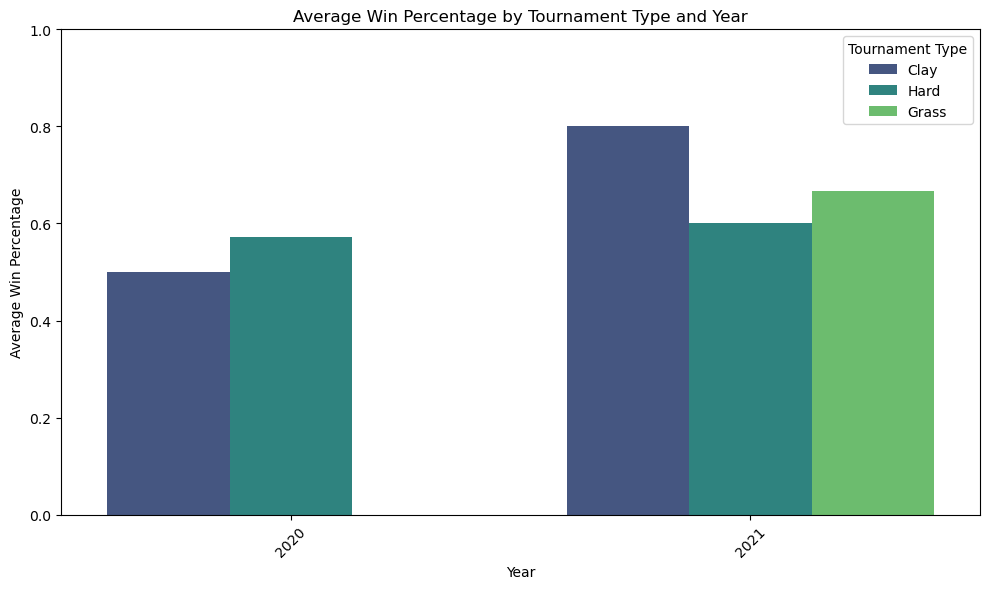

In [21]:
# Calculate average Win_Percentage by Year and Type
average_win_percentage = performance_summary.groupby(['Year', 'surface'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=average_win_percentage, x='Year', y='Win_Percentage', hue='surface', palette='viridis')

# Customize the plot
plt.title('Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
# Group by Year and Surface, and calculate average win percentage

tourney_performance = years.groupby(['Year', 'tourney_name']).agg({'Win_Percentage': 'mean'}).reset_index()

tourney_performance['Type'] = np.where(
    tourney_performance['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

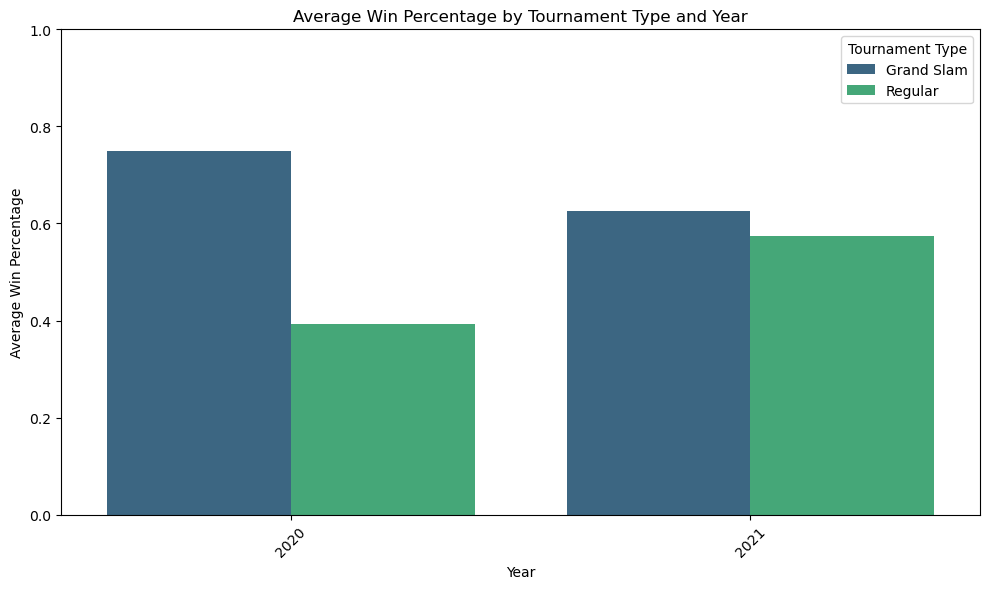

In [26]:
# Calculate average Win_Percentage by Year and Type
average_win_percentage = tourney_performance.groupby(['Year', 'Type'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=average_win_percentage, x='Year', y='Win_Percentage', hue='Type', palette='viridis')

# Customize the plot
plt.title('Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()